# GMU ECE 527 - Computer Exercise #05 - Code
**Stewart Schuler - G01395779**\
**20241007**

In [1]:
#Common imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

import os
try:
    os.mkdir('figures/')
except OSError as error:
    pass 



In [2]:
diabetesDF = pd.read_csv('datasets/diabetes.csv')

N1 = 600 #Put in a value here
DF_train = diabetesDF[:N1]
DF_test = diabetesDF[N1:]
X_train = np.asarray(DF_train.drop(labels='Outcome',axis=1))
y_train = np.asarray(DF_train['Outcome'])
X_test = np.asarray(DF_test.drop(labels='Outcome',axis=1))
y_test = np.asarray(DF_test['Outcome'])

Figure(640x480)


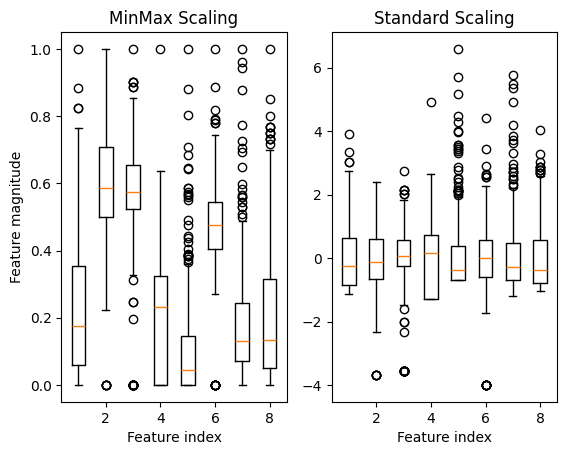

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Two different scalers. Decide which one to use
#     Minmax or Standard
mm_scaler=MinMaxScaler()
std_scaler=StandardScaler()

mm_scaler.fit(X_train)
X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

#plt.boxplot(mm_scaler, manage_ticks=False)
fig, axs = plt.subplots(1,2)
print(fig)
axs[0].boxplot(X_train_mm, manage_ticks=False)
axs[1].boxplot(X_train_std, manage_ticks=False)

#plt.yscale("symlog") 
axs[0].set_xlabel("Feature index")
axs[0].set_ylabel("Feature magnitude")
axs[0].set_title("MinMax Scaling")

axs[1].set_xlabel("Feature index")
axs[1].set_title("Standard Scaling")
plt.savefig("figures/5_3_box_plots.jpg")
plt.show()


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

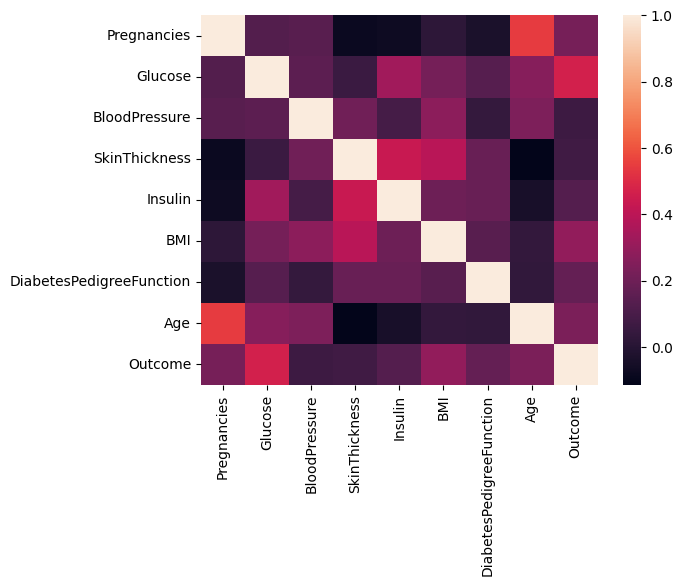

In [4]:
corr = diabetesDF.corr()
print(corr)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.savefig("figures/5_4_heatmap.jpg")

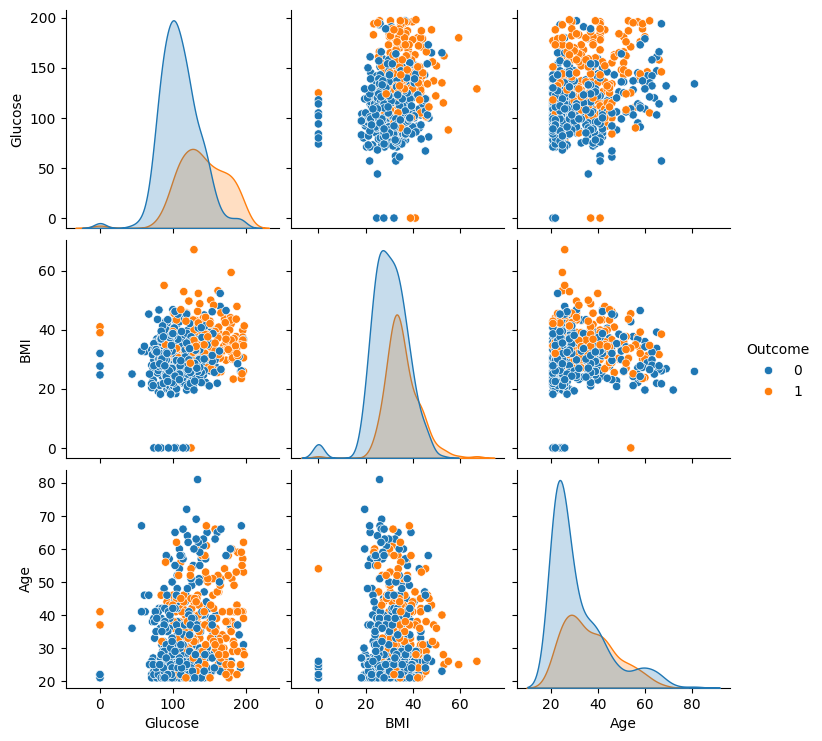

In [5]:
sns.pairplot(DF_train, vars=['Glucose', 'BMI', 'Age'], hue='Outcome')
plt.savefig("figures/5_4_pair_plot.jpg")
plt.show()  

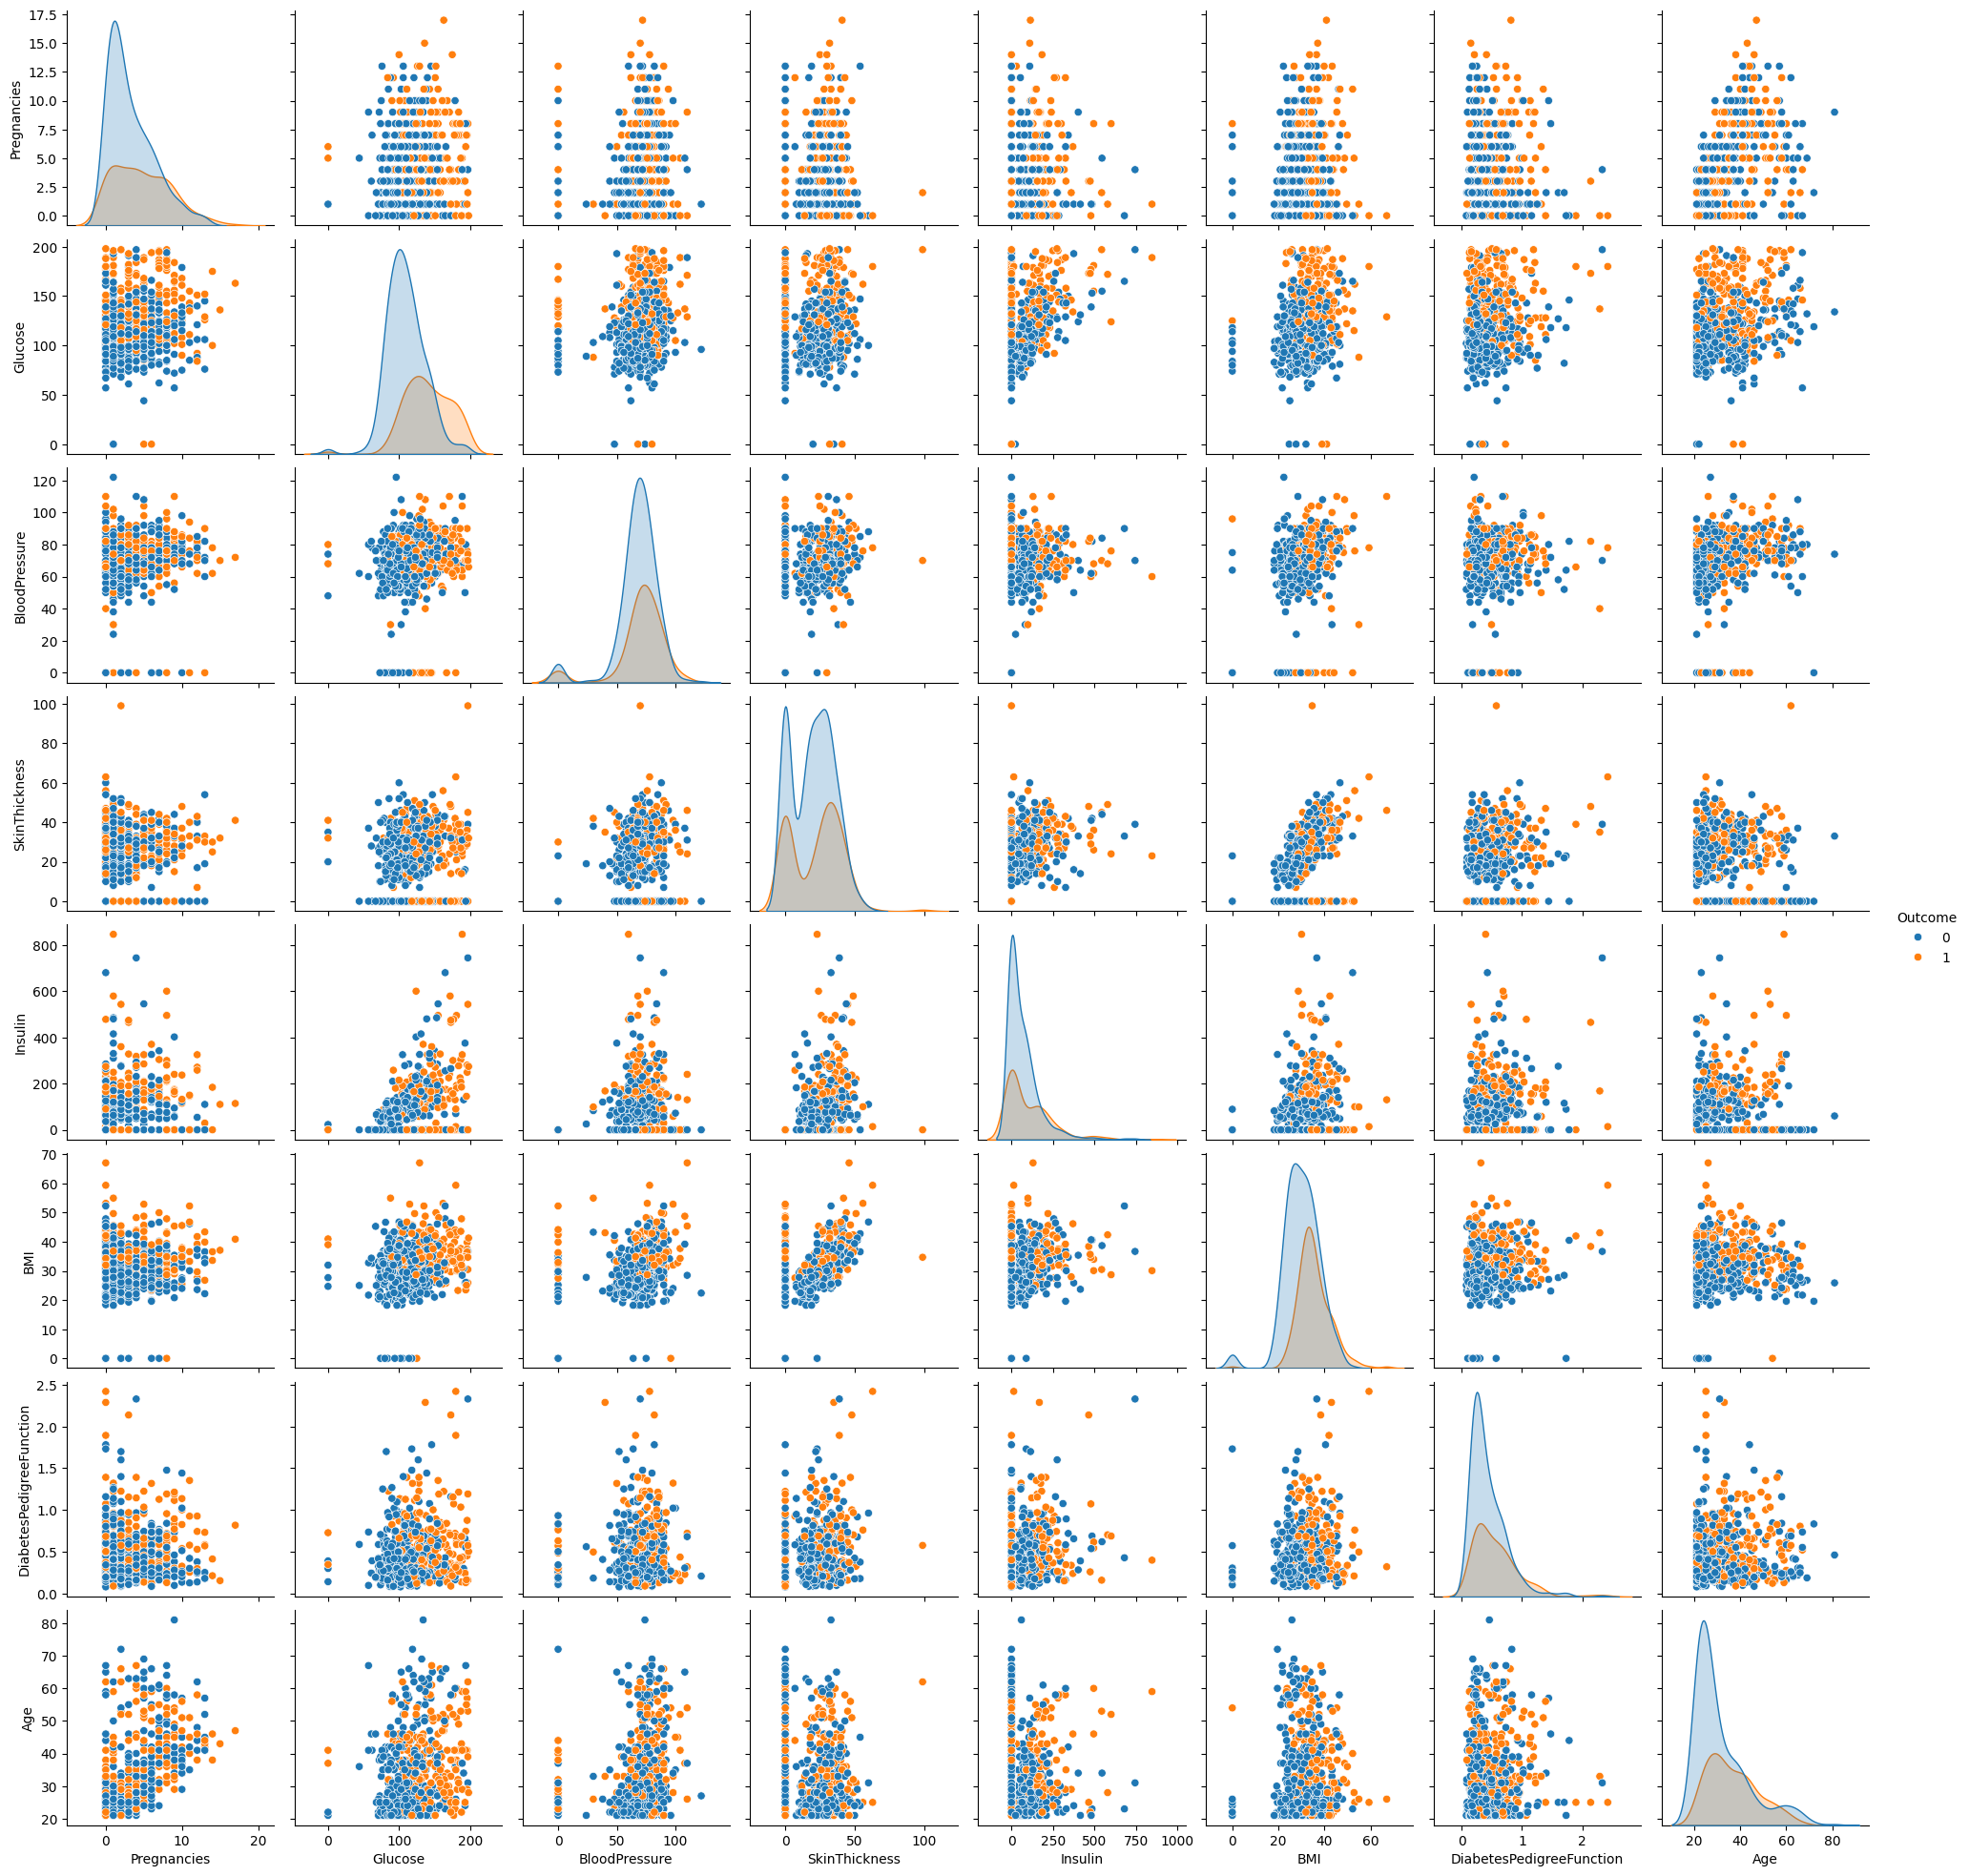

In [6]:
sns.pairplot(DF_train, hue='Outcome')
plt.show()  

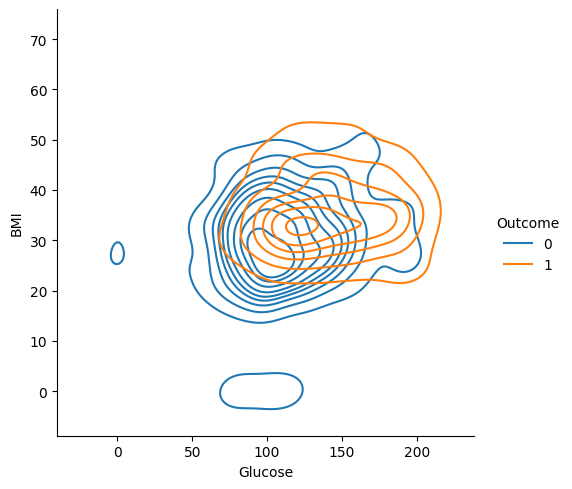

In [7]:
sns.displot(data=DF_train, x='Glucose',y='BMI',kind='kde', hue='Outcome')

## Logistical Regression 

In [8]:

for idx, dataset  in enumerate( ["raw", "mm", "std"]):
    if( idx == 0 ):
        train_ds = X_train
        test_ds = X_test
    elif( idx == 1 ):
        train_ds = X_train_mm
        test_ds = X_test_mm
    elif( idx == 2 ):
        train_ds = X_train_std
        test_ds = X_test_std
    
    clf = LogisticRegression()
    clf.fit(train_ds, y_train)    
    y_test_pred = clf.predict(test_ds)
    y_test_prob = clf.predict_proba(test_ds)
    print(f"({dataset})\nAccuracy: {100 * clf.score(test_ds,y_test)}%")

(raw)
Accuracy: 76.78571428571429%
(mm)
Accuracy: 78.57142857142857%
(std)
Accuracy: 77.38095238095238%


/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(std)
Accuracy: 78.57142857142857%
73.21428571428571% of predictions falls between 0.2-0.8
2.380952380952381% of predictions > 0.8
24.404761904761905% of predictions < 0.2
10.0% percent high conf 1
32.03125% percent high conf 0


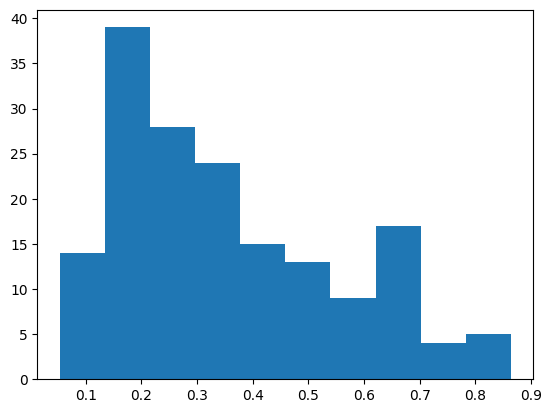

In [9]:

clf = LogisticRegression()
clf.fit(X_train_mm, y_train)    
y_test_pred = clf.predict(X_test_mm)
y_test_prob = clf.predict_proba(X_test_mm)
print(f"({dataset})\nAccuracy: {100 * clf.score(X_test_mm,y_test)}%")

plt.hist(y_test_prob[:,1])

val0 = y_test_prob[:,1] < 0.8
val1 = y_test_prob[:,1] > 0.2
val2 = y_test_prob[:,1] > 0.8
val3 = y_test_prob[:,1] < 0.2
val4 = y_test_prob[:,1] > 0.5
val5 = y_test_prob[:,1] < 0.5
plt.savefig("figures/5_5_distro.jpg")
print(f"{100*sum(val0&val1)/len(X_test_mm)}% of predictions falls between 0.2-0.8")
print(f"{100*sum(val2)/len(X_test_mm)}% of predictions > 0.8")
print(f"{100*sum(val3)/len(X_test_mm)}% of predictions < 0.2")
print(f"{100*sum(val2)/sum(val4)}% percent high conf 1")
print(f"{100*sum(val3)/sum(val5)}% percent high conf 0")

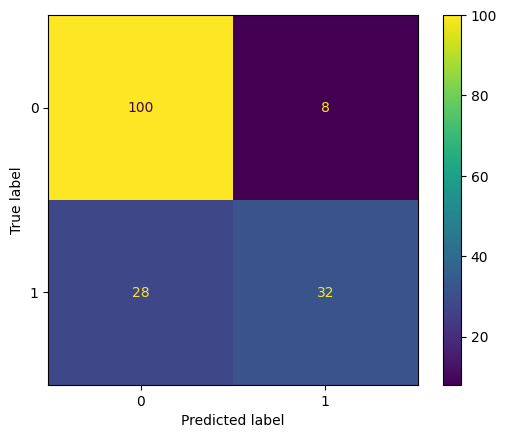

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
C = confusion_matrix(y_test, y_test_pred)
C_disp = ConfusionMatrixDisplay(C)
C_disp.plot()
plt.savefig("figures/5_6_cm.jpg")

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f"Precision: {precision_score(y_test, y_test_pred)}")
print(f"Recall: {recall_score(y_test, y_test_pred)}")
print(f"F1: {f1_score(y_test, y_test_pred)}")

Precision: 0.8
Recall: 0.5333333333333333
F1: 0.64


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       108
           1       0.80      0.53      0.64        60

    accuracy                           0.79       168
   macro avg       0.79      0.73      0.74       168
weighted avg       0.79      0.79      0.77       168



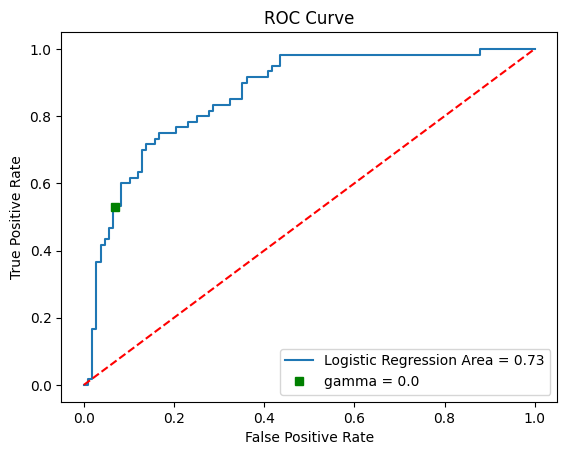

In [13]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_score = roc_auc_score(y_test, y_test_pred)
fpr, tpr, thr = roc_curve( y_test, y_test_prob[:,1])
plt.figure()
plt.plot( fpr, tpr, label=f"Logistic Regression Area = {roc_score:.2f}" )
plt.plot([0,1], [0,1], 'r--')
plt.plot([0.07], [0.53] , 'gs', label='gamma = 0.0')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig("figures/5_6_roc.jpg")
plt.show()

                          importance  positive
Features                                      
BloodPressure              -0.476741     False
Insulin                     0.063656      True
SkinThickness               0.108015      True
Age                         0.692044      True
Pregnancies                 1.429336      True
DiabetesPedigreeFunction    1.502943      True
BMI                         3.306621      True
Glucose                     4.271243      True


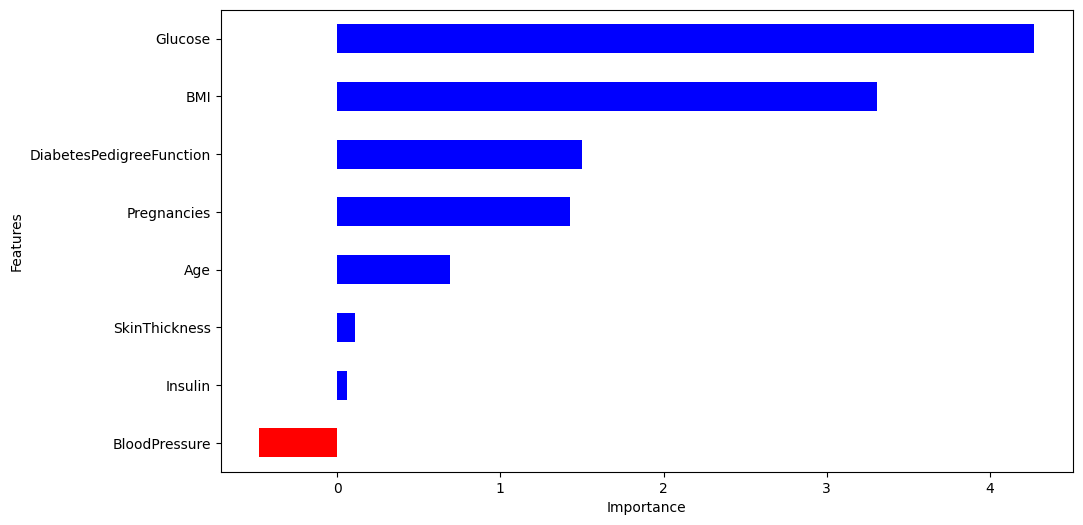

In [14]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
coeff = list(clf.coef_[0])
labels = list(DF_train.drop(labels='Outcome',axis=1).columns)
features = pd.DataFrame()
features['Features'] = labels[0:8]
features['importance'] = coeff[0:8]
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')
plt.savefig("figures/5_7_feature_weights.jpg")
print(features)

0: Pregnancies
1: Glucose
2: BloodPressure
3: SkinThickness
4: Insulin
5: BMI
6: DiabetesPedigreeFunction
7: Age
8: Outcome
[[0.03787169]]


Text(0.5, 1.0, 'Predicting Diabetes from Glucose Level')

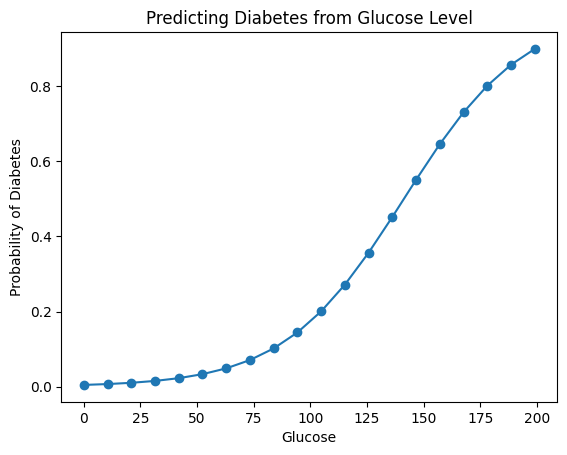

In [15]:
[ print(f"{idx}: {val}") for idx, val in enumerate(diabetesDF.columns)]
idx = 1
array1 = np.asarray(diabetesDF.iloc[:,idx:idx+1])
label1 = np.asarray(diabetesDF['Outcome'])

LR1 = LogisticRegression()
LR1.fit(array1, label1)

x=np.linspace(0,max(array1),20).reshape(-1,1)
y=LR1.predict_proba(x)
print(LR1.coef_)
plt.scatter(x,y[:,1])
plt.plot(x,y[:,1])
plt.xlabel(diabetesDF.columns[idx])
plt.ylabel('Probability of Diabetes')
plt.title(f'Predicting Diabetes from {diabetesDF.columns[idx]} Level') 

In [16]:
print(diabetesDF.head())

clf = LogisticRegression()
clf.fit(X_train_mm, y_train)    

print(clf.classes_)

# Specific Case from assignment
x = np.array([[ 0, 130, 125, 30, 100, 32, 1.1, 25 ]])
x_mm = mm_scaler.transform(x)
print(f"Specific case prob of diabetes: {clf.predict_proba(x_mm)[0][1]}")

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
[0 1]
Specific case prob of diabetes: 0.3149641040039849


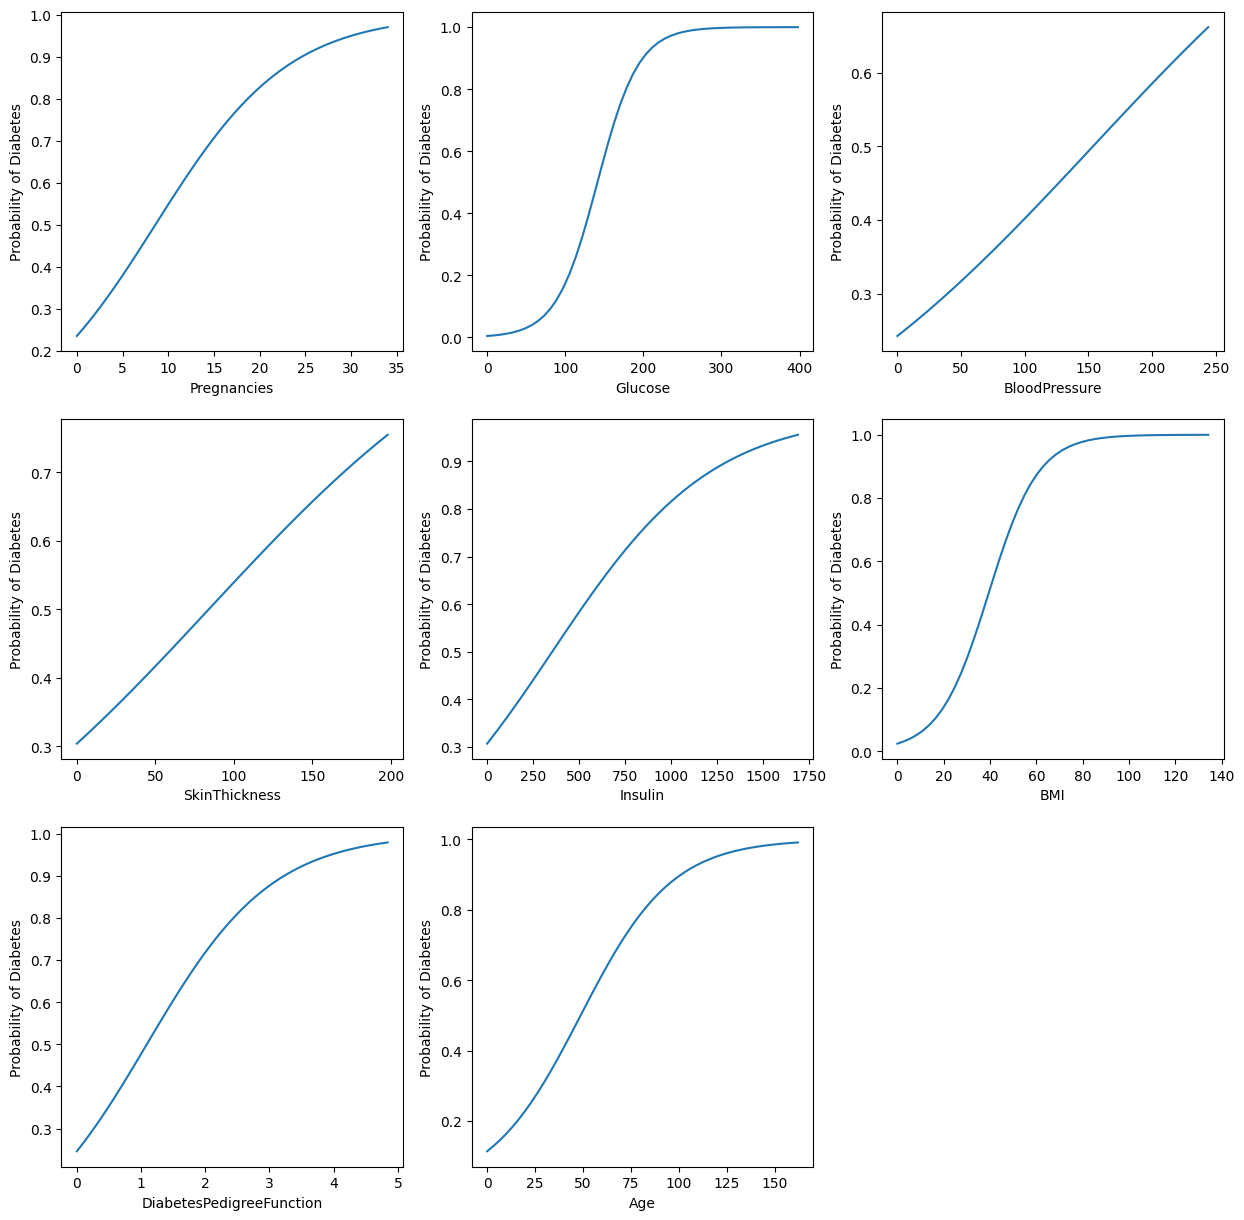

In [17]:
import math
fig, axs = plt.subplots(3,3)
fig.set_figwidth(15)
fig.set_figheight(15)
for idx, col in enumerate(diabetesDF.columns[0:-1:1]):
    array1 = np.asarray(diabetesDF.iloc[:,idx:idx+1:1])
    label1 = np.asarray(diabetesDF['Outcome'])

    x_plt=np.linspace(0,2*max(array1),50).reshape(-1,1)
    #mm1_scaler=MinMaxScaler()
    #mm1_scaler.fit(array1)
    #array1 = mm1_scaler.transform(array1)
    
    lr = LogisticRegression()
    lr.fit(array1, label1)
    x_clf=np.linspace(0,2,50).reshape(-1,1)
    y=lr.predict_proba(x_plt)

    axs[math.floor(idx/3)][idx%3].plot(x_plt,y[:,1], '-')
    axs[math.floor(idx/3)][idx%3].set_xlabel(col)
    axs[math.floor(idx/3)][idx%3].set_ylabel('Probability of Diabetes')
fig.delaxes(axs[2][2])
plt.savefig("figures/5_8_single_feature.jpg")

0: Pregnancies
1: Glucose
2: BloodPressure
3: SkinThickness
4: Insulin
5: BMI
6: DiabetesPedigreeFunction
7: Age
8: Outcome


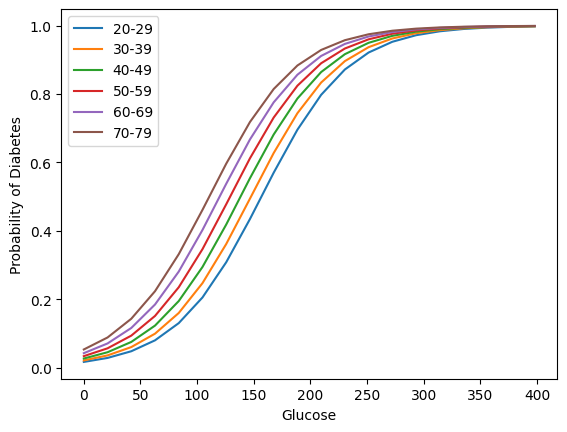

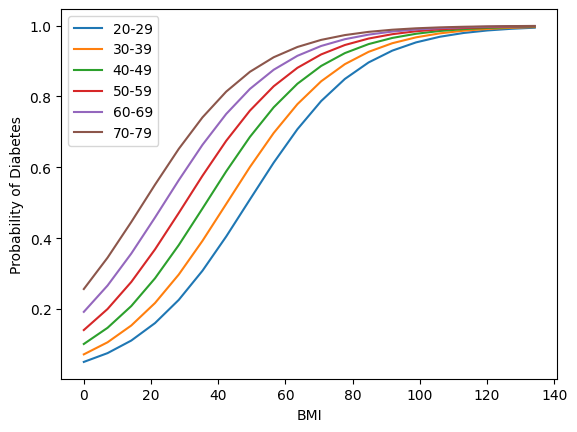

In [21]:
[ print(f"{idx}: {val}") for idx, val in enumerate(diabetesDF.columns)]
for feature_idx in [1,5]:#range(1,2):
    #feature_idx = 1
    array1 = np.asarray(diabetesDF.iloc[:,[feature_idx,7]])
    label1 = np.asarray(diabetesDF['Outcome'])
    #print(array1[:,0])
    mm2_scaler=MinMaxScaler()
    
    mm2_scaler.fit(array1)
    array1_mm = mm2_scaler.transform(array1)
    
    LR1 = LogisticRegression()
    LR1.fit(array1_mm, label1)
    
    for age_idx in range(6):
        base_age = 20 + age_idx*10
        N = 20
        x_clf = np.zeros((N*10,2))
        
        x_glc=np.linspace(0,2*max(array1[:,0]),20)
        for mod_age in range(10):
            for idx in range(N):
                x_clf[(mod_age*N)+idx,0] = x_glc[idx]
                x_clf[(mod_age*N)+idx,1] = base_age + mod_age
        
        x_clf_mm = mm2_scaler.transform(x_clf)
        y_prob = LR1.predict_proba(x_clf_mm)
        
        plt_glc = np.zeros((N,1))
        plt_prb = np.zeros((N,1))
        for idx, u_val in enumerate(np.unique(x_clf[:,0])):
            plt_glc[idx] = u_val
            plt_prb[idx] = np.mean(y_prob[np.where(x_clf[:,0]==u_val)[0],1])
        
        plt.plot(plt_glc, plt_prb, label=f"{base_age}-{base_age+9}")
    
    
    plt.legend()
    plt.xlabel(f"{diabetesDF.columns[feature_idx]}")
    plt.ylabel('Probability of Diabetes')
    plt.savefig(f"figures/ec_age_range_{diabetesDF.columns[feature_idx]}.jpg")
    plt.show()
    #plt.scatter(x,y[:,1])
    #plt.plot(x,y[:,1])
    #plt.xlabel(diabetesDF.columns[idx])
    #plt.ylabel('Probability of Diabetes')
    #plt.title(f'Predicting Diabetes from {diabetesDF.columns[idx]} Level') 